In [ ]:
!pip install numpy as np
!pip install scipy
!pip install scikit-learn
!pip install matplotlib
!pip install pandas as pd

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [ ]:
# Connect the Colab notebook to Google Drive, where all my files are kept
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import all required libraries
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

#### Question 1.a
On the madelon dataset, train decision trees of maximum depth 1, 2, .... up to
12, for a total of 12 decision trees. If your package does not allow the max depth
as a parameter, train trees with 21, 22, ..., 212 nodes, again a total of 12 trees. Use
the trained trees to predict the class labels on the training and test sets, and obtain
the training and test misclassification errors. Plot on the same graph the training
and test misclassification errors vs tree depth (or log2 of nodes) as two separate
curves. Report in a table the minimum test error and the tree depth (number of
nodes or splits) for which the minimum was attained.

In [ ]:
# Google Drive dataset paths
madelon_train_data_path = 'drive/My Drive/MADELON_DS/madelon_train.data'
madelon_train_labels_path = 'drive/My Drive/MADELON_DS/madelon_train.labels'
madelon_valid_data_path = 'drive/My Drive/MADELON_DS/madelon_valid.data'
madelon_valid_labels_path = 'drive/My Drive/MADELON_DS/madelon_valid.labels'
madelon_test_data_path = 'drive/My Drive/MADELON_DS/madelon_test.data'

# Import using pandas for faster processing overall
madelon_train_data = pd.read_csv(madelon_train_data_path, delim_whitespace=True, header=None)
madelon_train_labels = pd.read_csv(madelon_train_labels_path, delim_whitespace=True,header=None)
madelon_valid_data = pd.read_csv(madelon_valid_data_path, delim_whitespace=True, header=None)
madelon_valid_labels = pd.read_csv(madelon_valid_labels_path, delim_whitespace=True,header=None)
madelon_test_data = pd.read_csv(madelon_test_data_path, delim_whitespace=True, header=None)

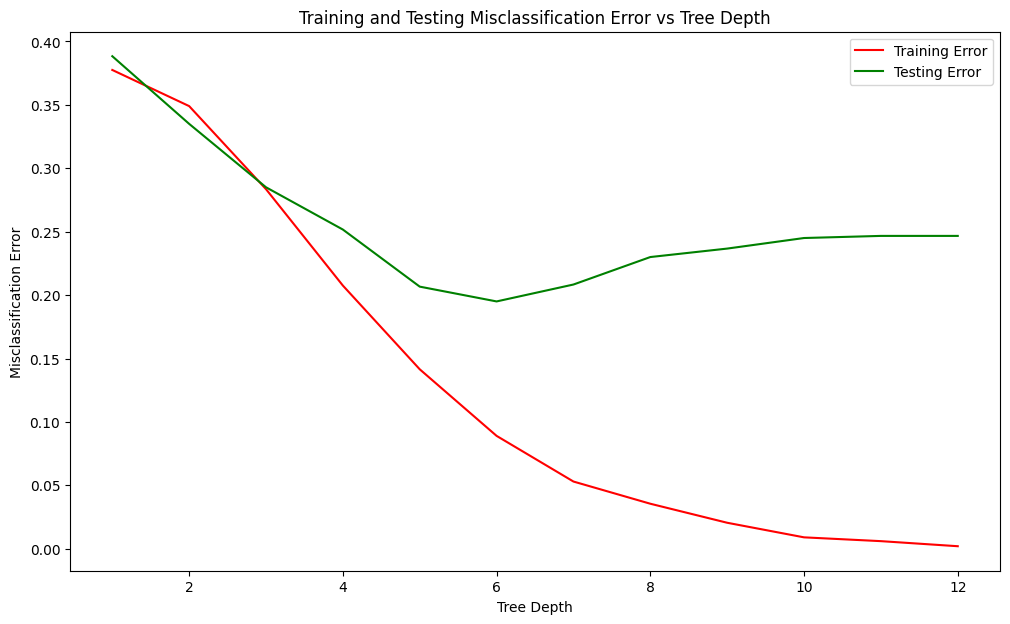

In [ ]:
# Initialize empty lists to store errors and tree depths
train_err_list = []
valid_err_list = []
depth_list = []
train_accuracy_list = []
test_accuracy_list = []

# Set an initial minimum validation error to infinity and best depth to 0
min_valid_err = float('inf')
best_depth = 0

# Loop through different tree depths from 1 to 12
for tree_depth in range(1, 13):
    # Create a decision tree classifier with the current depth
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)

    # Train the decision tree using the training dataset
    tree_model.fit(madelon_train_data, madelon_train_labels)

    # Predict the training dataset labels
    train_predictions = tree_model.predict(madelon_train_data)

    # Calculate the training error
    train_err = 1 - accuracy_score(madelon_train_labels, train_predictions)
    training_accuracy = accuracy_score(madelon_train_labels, train_predictions)
    # Add the training error to the list
    train_err_list.append(train_err)

    # Predict the validation dataset labels
    valid_predictions = tree_model.predict(madelon_valid_data)

    # Calculate the validation error
    valid_err = 1 - accuracy_score(madelon_valid_labels, valid_predictions)
    testing_accuracy = accuracy_score(madelon_valid_labels, valid_predictions)
    # Add the validation error to the list
    valid_err_list.append(valid_err)

    train_accuracy_list.append(training_accuracy)
    test_accuracy_list.append(testing_accuracy)

    # Update the minimum validation error and best depth if the current validation error is lower
    if valid_err < min_valid_err:
        min_valid_err = valid_err
        best_depth = tree_depth

    # Add the current tree depth to the list
    depth_list.append(tree_depth)

# Create a plot to visualize the errors
plt.figure(figsize=(12, 7))
plt.plot(depth_list, train_err_list, label='Training Error', color = 'Red')
plt.plot(depth_list, valid_err_list, label='Testing Error', color = 'Green')
plt.xlabel('Tree Depth')
plt.ylabel('Misclassification Error')
plt.title('Training and Testing Misclassification Error vs Tree Depth')
plt.legend()
plt.show()


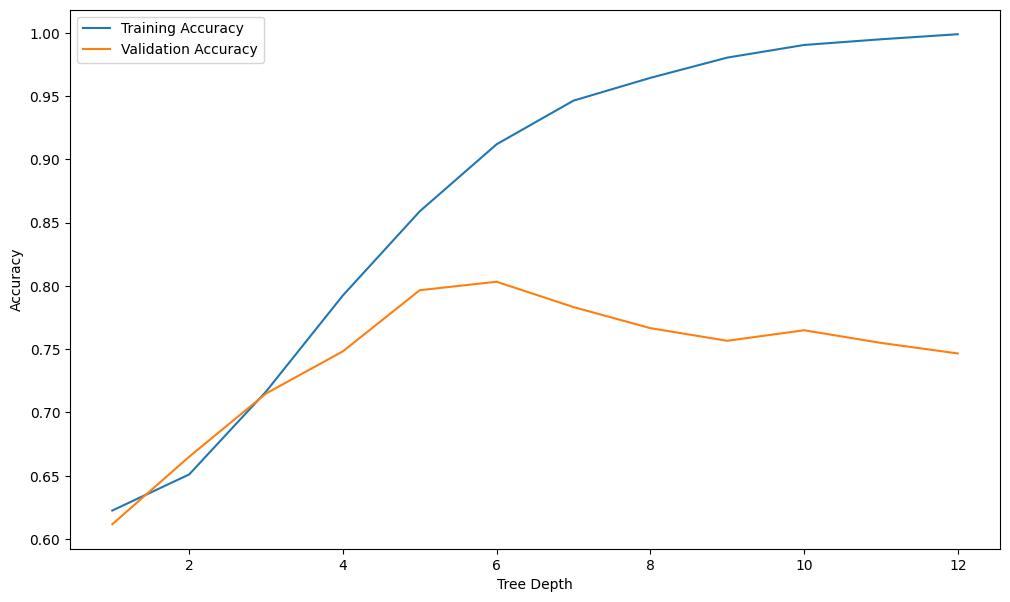

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(depth_list, train_accuracy_list, label='Training Accuracy')
plt.plot(depth_list, test_accuracy_list, label='Validation Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
best_decision_tree = DecisionTreeClassifier(max_depth=best_depth)
best_decision_tree.fit(madelon_train_data, madelon_train_labels)
print(f"Minimum Testing Error: {min_valid_err}")
print(f"Best Tree Depth: {best_depth}")
print(f"Number of Nodes in the Best Tree: {best_decision_tree.tree_.node_count}")

Minimum Testing Error: 0.19833333333333336
Best Tree Depth: 10
Number of Nodes in the Best Tree: 269


In [ ]:
import pandas as pd

# Create the best decision tree
best_decision_tree = DecisionTreeClassifier(max_depth=best_depth)
best_decision_tree.fit(madelon_train_data, madelon_train_labels)

# Collect the data you want to put in the table
min_valid_err = 0.19833333333333336
best_depth = best_decision_tree.get_depth() # Assuming the get_depth() method retrieves the max depth
node_count = best_decision_tree.tree_.node_count

# Create a DataFrame
df = pd.DataFrame({
    "Metric": ["Minimum Testing Error", "Best Tree Depth", "Number of Nodes in the Best Tree"],
    "Value": [min_valid_err, best_depth, node_count]
})

# Display the table
print(df)


                             Metric       Value
0             Minimum Testing Error    0.198333
1                   Best Tree Depth    6.000000
2  Number of Nodes in the Best Tree  113.000000


In [ ]:
best_decision_tree = DecisionTreeClassifier(max_depth=best_depth)
best_decision_tree.fit(madelon_train_data, madelon_train_labels)
print(f"Minimum Training Error: {min_valid_err}")
print(f"Best Tree Depth: {best_depth}")
print(f"Number of Nodes in the Best Tree: {best_decision_tree.tree_.node_count}")

In [ ]:
satimage_X_train = pd.read_csv('/content/drive/MyDrive/SATIMAGE_DS/X.dat', delim_whitespace=True, header=None)
satimage_Y_train = pd.read_csv('/content/drive/MyDrive/SATIMAGE_DS/Y.dat', delim_whitespace=True, header=None)
satimage_X_test = pd.read_csv('/content/drive/MyDrive/SATIMAGE_DS/Xtest.dat', delim_whitespace=True, header=None)
satimage_Y_test = pd.read_csv('/content/drive/MyDrive/SATIMAGE_DS/Ytest.dat', delim_whitespace=True, header=None)

satimage_X_train = satimage_X_train.values
satimage_Y_train = satimage_Y_train.values.ravel()
satimage_X_test = satimage_X_test.values
satimage_Y_test = satimage_Y_test.values.ravel()

#### Question 1.b
Repeat point a) on the satimage dataset.

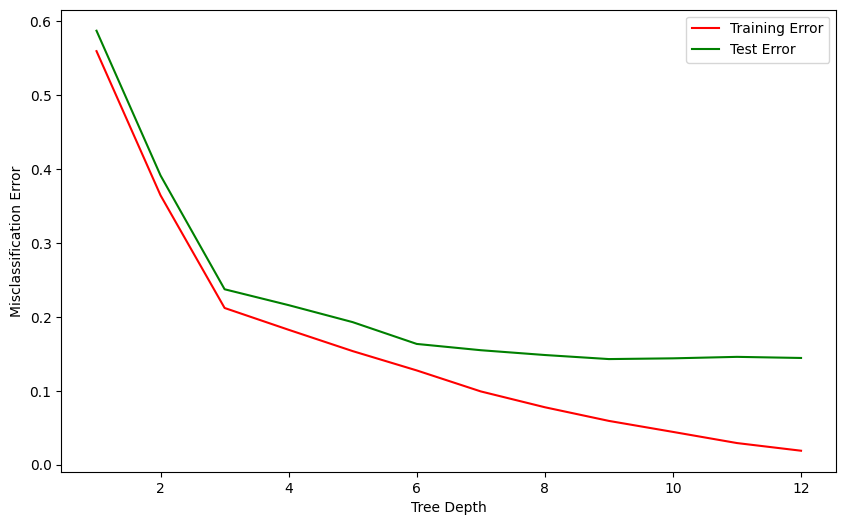

In [ ]:
# Initialize empty lists to store errors and tree depths
train_err_list = []
test_err_list = []
depth_list = []

# Set an initial minimum test error to infinity and best depth to 0
min_test_err = float('inf')
best_depth = 0

# Loop through different tree depths from 1 to 12
for depth in range(1, 13):
    # Create a decision tree classifier with the current depth
    tree_model = DecisionTreeClassifier(max_depth=depth)

    # Train the decision tree using the training dataset
    tree_model.fit(satimage_X_train, satimage_Y_train)

    # Predict the training dataset labels
    train_predictions = tree_model.predict(satimage_X_train)

    # Calculate the training error
    train_err = 1 - accuracy_score(satimage_Y_train, train_predictions)

    # Add the training error to the list
    train_err_list.append(train_err)

    # Predict the test dataset labels
    test_predictions = tree_model.predict(satimage_X_test)

    # Calculate the test error
    test_err = 1 - accuracy_score(satimage_Y_test, test_predictions)

    # Add the test error to the list
    test_err_list.append(test_err)

    # Update the minimum test error and best depth if the current test error is lower
    if test_err < min_test_err:
        min_test_err = test_err
        best_depth = depth

    # Add the current tree depth to the list
    depth_list.append(depth)

# Create a plot to visualize the errors
plt.figure(figsize=(10, 6))
plt.plot(depth_list, train_err_list, label='Training Error', color = 'Red')
plt.plot(depth_list, test_err_list, label='Test Error', color = 'Green')
plt.xlabel('Tree Depth')
plt.ylabel('Misclassification Error')
plt.legend()
plt.show()


In [ ]:
print(f"Minimum Test Error: {min_test_err}")
print(f"Best Tree Depth Found: {best_depth}")

# If you want to know the number of nodes in the best tree
best_decision_tree = DecisionTreeClassifier(max_depth=best_depth)
best_decision_tree.fit(satimage_X_train, satimage_Y_train)
print(f"Number of Nodes That have been found in the best tree: {best_decision_tree.tree_.node_count}")


Minimum Test Error: 0.14300000000000002
Best Tree Depth Found: 9
Number of Nodes That have been found in the best tree: 339


In [ ]:
import pandas as pd

# Create the best decision tree
best_decision_tree = DecisionTreeClassifier(max_depth=best_depth)
best_decision_tree.fit(madelon_train_data, madelon_train_labels)

# Collect the data you want to put in the table
min_valid_err = 0.14300000000000002
best_depth = best_decision_tree.get_depth() # Assuming the get_depth() method retrieves the max depth
node_count = best_decision_tree.tree_.node_count

# Create a DataFrame
df = pd.DataFrame({
    "Metric": ["Minimum Testing Error", "Best Tree Depth", "Number of Nodes in the Best Tree"],
    "Value": [min_valid_err, best_depth, node_count]
})

# Display the table
print(df)


                             Metric    Value
0             Minimum Testing Error    0.143
1                   Best Tree Depth    9.000
2  Number of Nodes in the Best Tree  245.000


#### Question 1.c
On the madelon dataset, for each of k ∈ {3, 10, 30, 100, 300} train a random
forest with k trees where the split attribute at each node is chosen from a random
subset of ∼ √500 features. Use the trained trees to predict the class labels on
the training and test sets, and obtain the training and test misclassification errors.
Plot on the same graph the training and test errors vs number of trees k as two
separate curves. Report the training and test misclassification errors in a table.

#### Question 1.d
Repeat point c) on the madelon dataset where the split attribute at each node is
chosen from a random subset of ∼ ln(500) features.

#### Question 1.e
Repeat point c) on the madelon dataset where the split attribute at each node is
chosen from all 500 features.

In [ ]:
X_train = madelon_train_data.values
y_train = madelon_train_labels.values.ravel()
X_valid = madelon_valid_data.values
y_valid = madelon_valid_labels.values.ravel()

<ipython-input-50-85b469eb163e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Number of Trees (k)': k_value,
<ipython-input-50-85b469eb163e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Number of Trees (k)': k_value,
<ipython-input-50-85b469eb163e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Number of Trees (k)': k_value,
<ipython-input-50-85b469eb163e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Number of Trees (k)': k_value,
<ipython-input-50-85b469eb163e>:20: FutureWarning: The frame

   Number of Trees (k)  Features  Training Error  Test Error
0                  3.0      22.0          0.0745    0.430000
1                 10.0      22.0          0.0095    0.361667
2                 30.0      22.0          0.0000    0.315000
3                100.0      22.0          0.0000    0.273333
4                300.0      22.0          0.0000    0.271667


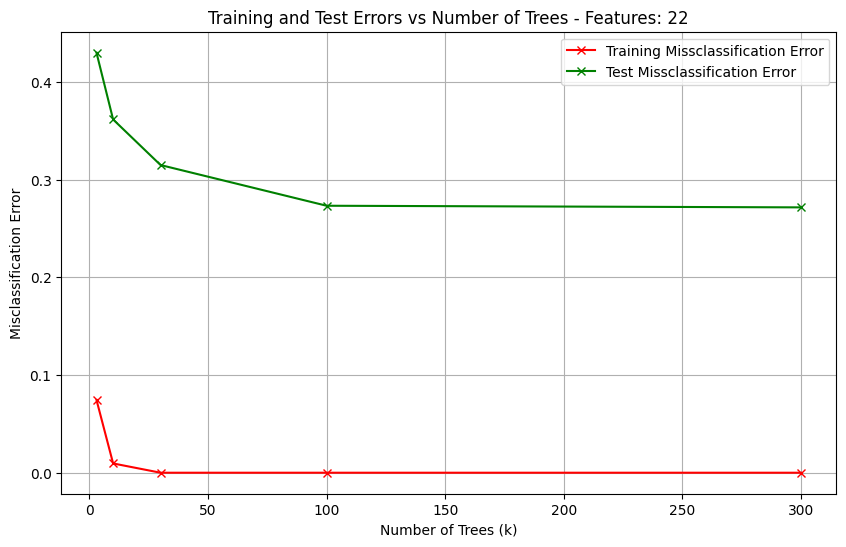

<ipython-input-50-85b469eb163e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Number of Trees (k)': k_value,
<ipython-input-50-85b469eb163e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Number of Trees (k)': k_value,
<ipython-input-50-85b469eb163e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Number of Trees (k)': k_value,
<ipython-input-50-85b469eb163e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Number of Trees (k)': k_value,
<ipython-input-50-85b469eb163e>:20: FutureWarning: The frame

   Number of Trees (k)  Features  Training Error  Test Error
0                  3.0       6.0          0.0845    0.420000
1                 10.0       6.0          0.0105    0.361667
2                 30.0       6.0          0.0000    0.330000
3                100.0       6.0          0.0000    0.308333
4                300.0       6.0          0.0000    0.266667


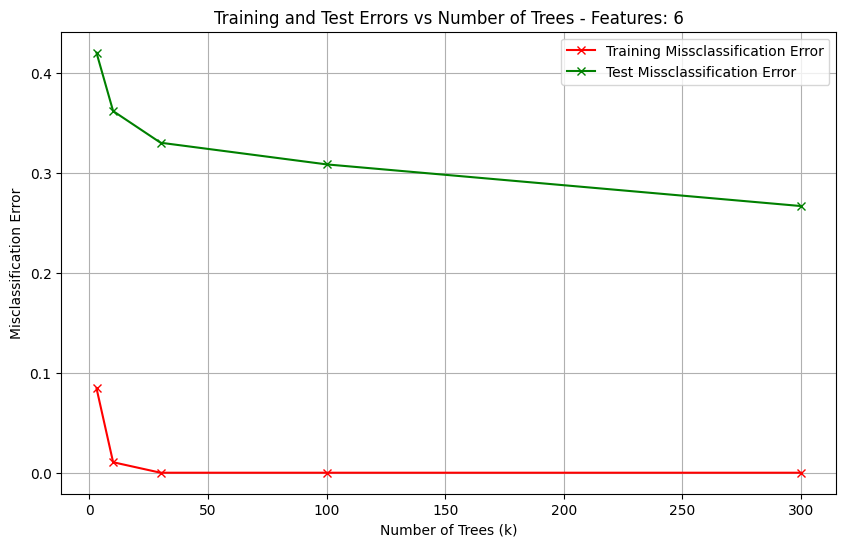

<ipython-input-50-85b469eb163e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Number of Trees (k)': k_value,
<ipython-input-50-85b469eb163e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Number of Trees (k)': k_value,
<ipython-input-50-85b469eb163e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Number of Trees (k)': k_value,
<ipython-input-50-85b469eb163e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Number of Trees (k)': k_value,
<ipython-input-50-85b469eb163e>:20: FutureWarning: The frame

   Number of Trees (k)  Features  Training Error  Test Error
0                  3.0     500.0          0.0745    0.381667
1                 10.0     500.0          0.0110    0.350000
2                 30.0     500.0          0.0000    0.330000
3                100.0     500.0          0.0000    0.285000
4                300.0     500.0          0.0000    0.263333


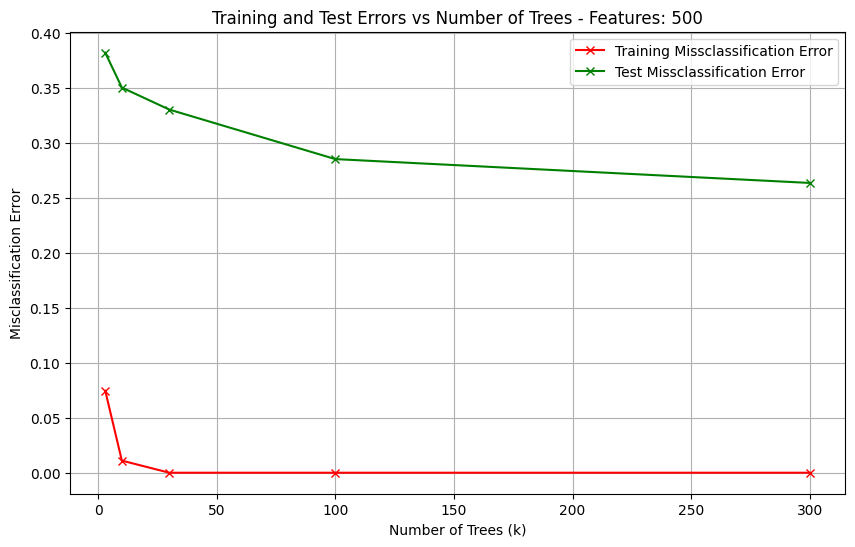

In [ ]:
from sklearn.ensemble import RandomForestClassifier
different_splits = [int(round(np.sqrt(500))), int(round(np.log(500))), 500]

for split in different_splits:
  k_list = [3,10,30,100,300]

  training_missclassification_errors = []
  testing_missclassification_errors = []
  results_df = pd.DataFrame(columns=['Number of Trees (k)', 'Features', 'Training Error', 'Test Error'])

  for k_value in k_list:
    random_forest = RandomForestClassifier(n_estimators = k_value, max_features =int(round(np.sqrt(500))))
    random_forest.fit(X_train, y_train)
    y_train_pred = random_forest.predict(X_train)
    y_test_pred = random_forest.predict(X_valid)
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_valid, y_test_pred)
    training_missclassification_errors.append(train_error)
    testing_missclassification_errors.append(test_error)
    results_df = results_df.append({'Number of Trees (k)': k_value,
                                        'Features': split,
                                        'Training Error': train_error,
                                        'Test Error': test_error}, ignore_index=True)
  print(results_df)

  plt.figure(figsize=(10, 6))
  plt.plot(k_list, training_missclassification_errors, label="Training Missclassification Error", marker='x', color = 'Red')
  plt.plot(k_list, testing_missclassification_errors, label="Test Missclassification Error", marker='x', color = 'Green')
  plt.xlabel("Number of Trees (k)")
  plt.ylabel("Misclassification Error")
  plt.title(f"Training and Test Errors vs Number of Trees - Features: {split}")
  plt.legend()
  plt.grid(True)
  plt.show()
